## Importing libraries

In [1]:

#regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning modeling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# splitting and data evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score

# filling missing and categorising non numerical datas
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



### importing datas

In [2]:
df = pd.read_csv("2500 Concrete design mixes.csv")
df

,coarse_Agg,Fine_Agg,Size_of_Coarse_Agg,Passing_0.6mm_Sieve,Target_Mean_Strength,Cement_O.P.C,W/C_Ratio,Water_Content,Total_Agg,Fine_Agg.1,Coarse_Agg,Workability_Slump,7_day_str
0,Crushed,Natural,40,0.0,43.0,365,0.52,225,1870,710,1160,160,21.8
1,Crushed,Natural,20,26.1,38.0,360,0.53,190,1900,780,1120,100,28.2
2,Natural,Natural,20,39.0,38.0,350,0.51,180,1970,690,1280,110,30.4
3,Natural,Natural,20,39.0,38.0,350,0.51,180,1870,690,1180,110,30.4
4,Crushed,Natural,20,45.6,38.0,350,0.53,185,1915,725,1190,120,32.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,Crushed,Natural,20,42.0,43.0,375,0.51,190,1875,750,1125,130,26.9
707,Crushed,Natural,20,50.1,43.0,375,0.51,190,1855,755,1130,100,24.5
708,Crushed,Natural,20,29.1,43.1,385,0.48,215,1810,685,1125,70,22.3
709,Natural,Natural,20,32.8,43.0,375,0.48,180,1845,665,1180,150,24.8


### Describe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   coarse_Agg            711 non-null    object 
 1   Fine_Agg              711 non-null    object 
 2   Size_of_Coarse_Agg    711 non-null    int64  
 3   Passing_0.6mm_Sieve   711 non-null    float64
 4   Target_Mean_Strength  711 non-null    float64
 5   Cement_O.P.C          711 non-null    int64  
 6   W/C_Ratio             711 non-null    float64
 7   Water_Content         711 non-null    int64  
 8   Total_Agg             711 non-null    int64  
 9   Fine_Agg.1            711 non-null    int64  
 10  Coarse_Agg            711 non-null    int64  
 11  Workability_Slump     711 non-null    int64  
 12  7_day_str             711 non-null    float64
dtypes: float64(4), int64(7), object(2)
memory usage: 72.3+ KB


In [4]:
df.columns

Index(['coarse_Agg', 'Fine_Agg', 'Size_of_Coarse_Agg', 'Passing_0.6mm_Sieve',
       'Target_Mean_Strength', 'Cement_O.P.C', 'W/C_Ratio', 'Water_Content',
       'Total_Agg', 'Fine_Agg.1', 'Coarse_Agg', 'Workability_Slump',
       '7_day_str'],
      dtype='object')

In [5]:
df.describe()

,Size_of_Coarse_Agg,Passing_0.6mm_Sieve,Target_Mean_Strength,Cement_O.P.C,W/C_Ratio,Water_Content,Total_Agg,Fine_Agg.1,Coarse_Agg,Workability_Slump,7_day_str
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,27.735584,41.164416,39.853868,363.298172,0.505879,184.596343,1863.403657,695.711674,1164.001406,118.803094,27.178481
std,9.862026,19.331563,3.000593,16.256777,0.026818,12.967845,51.171889,59.859317,70.576290,27.763398,4.539135
min,0.000000,0.000000,0.000000,250.000000,0.410000,100.000000,1185.000000,275.000000,670.000000,60.000000,0.000000
25%,20.000000,30.400000,38.000000,350.000000,0.490000,175.000000,1845.000000,670.000000,1142.500000,100.000000,24.600000
50%,20.000000,42.100000,38.000000,360.000000,0.510000,180.000000,1870.000000,695.000000,1175.000000,120.000000,27.000000
75%,40.000000,53.550000,43.000000,375.000000,0.510000,190.000000,1885.000000,735.000000,1200.000000,140.000000,30.250000
max,40.000000,96.900000,43.100000,410.000000,0.600000,290.000000,1970.000000,865.000000,1510.000000,220.000000,39.000000


In [6]:
df.head()

,coarse_Agg,Fine_Agg,Size_of_Coarse_Agg,Passing_0.6mm_Sieve,Target_Mean_Strength,Cement_O.P.C,W/C_Ratio,Water_Content,Total_Agg,Fine_Agg.1,Coarse_Agg,Workability_Slump,7_day_str
0,Crushed,Natural,40,0.0,43.0,365,0.52,225,1870,710,1160,160,21.8
1,Crushed,Natural,20,26.1,38.0,360,0.53,190,1900,780,1120,100,28.2
2,Natural,Natural,20,39.0,38.0,350,0.51,180,1970,690,1280,110,30.4
3,Natural,Natural,20,39.0,38.0,350,0.51,180,1870,690,1180,110,30.4
4,Crushed,Natural,20,45.6,38.0,350,0.53,185,1915,725,1190,120,32.8


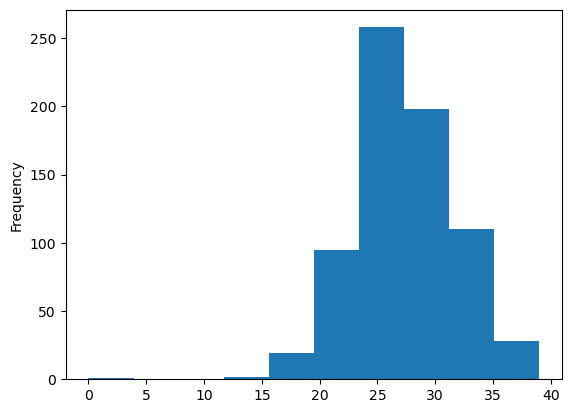

In [7]:
df['7_day_str'].plot.hist();

majority of the aggregates attain strength between 25 to 30kn

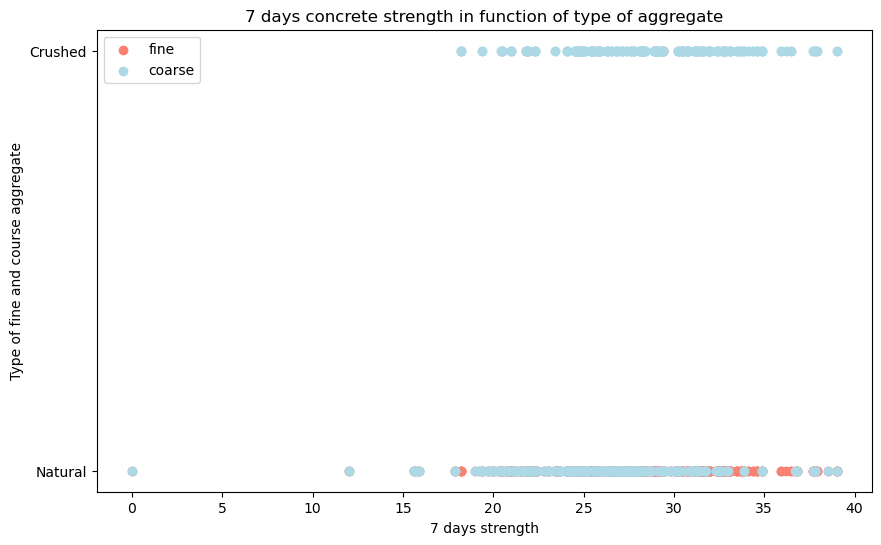

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['7_day_str'],
           df['Fine_Agg'],
           c='salmon')
plt.scatter(df['7_day_str'],
           df['coarse_Agg'],
           c='lightblue')
plt.title('7 days concrete strength in function of type of aggregate')
plt.legend(['fine', 'coarse'])
plt.xlabel('7 days strength')
plt.ylabel('Type of fine and course aggregate');

### Converting missing values into numbers

In [9]:
df.head()

,coarse_Agg,Fine_Agg,Size_of_Coarse_Agg,Passing_0.6mm_Sieve,Target_Mean_Strength,Cement_O.P.C,W/C_Ratio,Water_Content,Total_Agg,Fine_Agg.1,Coarse_Agg,Workability_Slump,7_day_str
0,Crushed,Natural,40,0.0,43.0,365,0.52,225,1870,710,1160,160,21.8
1,Crushed,Natural,20,26.1,38.0,360,0.53,190,1900,780,1120,100,28.2
2,Natural,Natural,20,39.0,38.0,350,0.51,180,1970,690,1280,110,30.4
3,Natural,Natural,20,39.0,38.0,350,0.51,180,1870,690,1180,110,30.4
4,Crushed,Natural,20,45.6,38.0,350,0.53,185,1915,725,1190,120,32.8


In [10]:
#spliting dataset

# selecting the features that will be used to predict (independent varriable)
x = df.drop(['Water_Content', 'Total_Agg', 'Fine_Agg.1', 'Coarse_Agg'], axis = 1)

# selecting the features to be predicted (dependent varriable)
y = df.drop(['coarse_Agg', 'Fine_Agg', 'Size_of_Coarse_Agg', 'Passing_0.6mm_Sieve', 'Target_Mean_Strength', 'Cement_O.P.C', 'W/C_Ratio', 'Workability_Slump', '7_day_str'], axis = 1)
y

,Water_Content,Total_Agg,Fine_Agg.1,Coarse_Agg
0,225,1870,710,1160
1,190,1900,780,1120
2,180,1970,690,1280
3,180,1870,690,1180
4,185,1915,725,1190
...,...,...,...,...
706,190,1875,750,1125
707,190,1855,755,1130
708,215,1810,685,1125
709,180,1845,665,1180


In [11]:
# check for missing datas using `SimpleImputer`
df.isna().sum()

coarse_Agg              0
Fine_Agg                0
Size_of_Coarse_Agg      0
Passing_0.6mm_Sieve     0
Target_Mean_Strength    0
Cement_O.P.C            0
W/C_Ratio               0
Water_Content           0
Total_Agg               0
Fine_Agg.1              0
Coarse_Agg              0
Workability_Slump       0
7_day_str               0
dtype: int64

no missing values, so there will be no need to use simpleimputer module

In [12]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')

#define columns
cat_features = ['coarse_Agg', 'Fine_Agg', 'Size_of_Coarse_Agg', 'Passing_0.6mm_Sieve', 'Target_Mean_Strength', 'Cement_O.P.C', 'W/C_Ratio', 'Workability_Slump', '7_day_str']


#Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
])

##transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Crushed', 'Natural', 40, ..., 0.52, 160, 21.8],
       ['Crushed', 'Natural', 20, ..., 0.53, 100, 28.2],
       ['Natural', 'Natural', 20, ..., 0.51, 110, 30.4],
       ...,
       ['Crushed', 'Natural', 20, ..., 0.48, 70, 22.3],
       ['Natural', 'Natural', 20, ..., 0.48, 150, 24.8],
       ['Natural', 'Natural', 20, ..., 0.47, 95, 25.9]], dtype=object)

In [13]:
x_filled = pd.DataFrame(filled_x, columns = ['coarse_Agg', 'Fine_Agg', 'Size_of_Coarse_Agg', 'Passing_0.6mm_Sieve', 'Target_Mean_Strength', 'Cement_O.P.C', 'W/C_Ratio', 'Workability_Slump', '7_day_str'])
x_filled

,coarse_Agg,Fine_Agg,Size_of_Coarse_Agg,Passing_0.6mm_Sieve,Target_Mean_Strength,Cement_O.P.C,W/C_Ratio,Workability_Slump,7_day_str
0,Crushed,Natural,40,0.0,43.0,365,0.52,160,21.8
1,Crushed,Natural,20,26.1,38.0,360,0.53,100,28.2
2,Natural,Natural,20,39.0,38.0,350,0.51,110,30.4
3,Natural,Natural,20,39.0,38.0,350,0.51,110,30.4
4,Crushed,Natural,20,45.6,38.0,350,0.53,120,32.8
...,...,...,...,...,...,...,...,...,...
706,Crushed,Natural,20,42.0,43.0,375,0.51,130,26.9
707,Crushed,Natural,20,50.1,43.0,375,0.51,100,24.5
708,Crushed,Natural,20,29.1,43.1,385,0.48,70,22.3
709,Natural,Natural,20,32.8,43.0,375,0.48,150,24.8


In [14]:
df['coarse_Agg'].value_counts()

coarse_Agg
Natural    412
Crushed    299
Name: count, dtype: int64

### converting strings into categories 

In [15]:
# columns with strings that need to be categorizied in nummerical scale. (course_Agg and Fine_Agg)

catergorical_features = ['coarse_Agg', 'Fine_Agg']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  catergorical_features)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x_filled)
transformed_x

array([[1.0, 0.0, 0.0, ..., 0.52, 160, 21.8],
       [1.0, 0.0, 0.0, ..., 0.53, 100, 28.2],
       [0.0, 1.0, 0.0, ..., 0.51, 110, 30.4],
       ...,
       [1.0, 0.0, 0.0, ..., 0.48, 70, 22.3],
       [0.0, 1.0, 0.0, ..., 0.48, 150, 24.8],
       [0.0, 1.0, 0.0, ..., 0.47, 95, 25.9]], dtype=object)

### machine learning

In [16]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6311199067266472

In [17]:
np.random.seed(42)

model2 = Ridge()
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.3537738171811424

In [18]:
df.head()

,coarse_Agg,Fine_Agg,Size_of_Coarse_Agg,Passing_0.6mm_Sieve,Target_Mean_Strength,Cement_O.P.C,W/C_Ratio,Water_Content,Total_Agg,Fine_Agg.1,Coarse_Agg,Workability_Slump,7_day_str
0,Crushed,Natural,40,0.0,43.0,365,0.52,225,1870,710,1160,160,21.8
1,Crushed,Natural,20,26.1,38.0,360,0.53,190,1900,780,1120,100,28.2
2,Natural,Natural,20,39.0,38.0,350,0.51,180,1970,690,1280,110,30.4
3,Natural,Natural,20,39.0,38.0,350,0.51,180,1870,690,1180,110,30.4
4,Crushed,Natural,20,45.6,38.0,350,0.53,185,1915,725,1190,120,32.8


In [19]:
np.random.seed(42)

y_preds = model.predict(x_test)
y_preds

array([[ 173.83      , 1866.47      ,  670.2       , 1185.5785    ],
       [ 195.5       , 1906.85      ,  796.8       , 1106.149     ],
       [ 176.2       , 1868.6       ,  671.6       , 1197.        ],
       [ 184.99      , 1914.9       ,  710.9       , 1202.8125    ],
       [ 179.32      , 1844.48      ,  683.91      , 1159.32      ],
       [ 189.65      , 1873.1       ,  714.55      , 1158.55      ],
       [ 175.05      , 1872.8       ,  687.        , 1185.9       ],
       [ 176.8       , 1873.35      ,  629.03      , 1242.32      ],
       [ 222.61785714, 1919.2       ,  768.9       , 1147.21666667],
       [ 181.4       , 1855.61666667,  729.53333333, 1150.41666667],
       [ 189.45      , 1909.85      ,  775.9       , 1133.95      ],
       [ 174.85      , 1865.9       ,  687.        , 1169.65266667],
       [ 190.        , 1918.6       ,  763.9       , 1154.7       ],
       [ 185.1       , 1889.15      ,  693.75      , 1192.6       ],
       [ 178.85      , 1841.75    

## improving the model

In [20]:
## creating a grid for model 1


model1_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    # 'max_features': ['auto', 'sprt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'bootstrap': [True, False]
}

### Turning the model hyperparameters

In [21]:
 np.random.seed(42)

model1_rs = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                param_distributions=model1_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True,
                               random_state=42,
                               n_jobs=-1
                               
                            )

model1_rs.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=True)

In [22]:
model1_rs.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 90,
 'bootstrap': True}

In [23]:
model1_rs.score(x_test, y_test)

0.6450363530086125

In [ ]:
# Grid search cv
np.random.seed(42)

model1_grid_gs = {
    'n_estimators': [int(x) for x in np.linspace(start=1700, stop=2200, num=10)],
    # 'max_features': ['auto', 'sprt'],
    'max_depth': [int(x) for x in np.linspace(80, 120, num=11)],
    'min_samples_split': np.arange(2, 6, 2),
    'min_samples_leaf': np.arange(1, 3, 2),
    'bootstrap': [True]
}

model1_gs = GridSearchCV(estimator=RandomForestRegressor(),
                                param_grid=model1_grid_gs,
                                cv=5,
                                verbose=True,
                         n_jobs=-1
                            )

model1_gs.fit(x_train, y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


In [ ]:
model1_gs.score(x_test, y_test)

### feature importance

this is another way of asking, 'which features contributed most to the outcomes of the model and how it did contibute?

lets fin the features that are important
one way to find feature importance is to search for '(MODEL NAME) feature importance'

In [ ]:
df.head()

In [ ]:
#check coef_
clf.fit(x_train, y_train)
clf.coef_

#matching the coef to the features

feature_dict = dict(zip(df.columns, list(clf.coef_[0])) )
feature_dict

# visualization

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='feature importance', legend = False);
